In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('appleStore_description.csv')

In [3]:
df1.head(5)

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [4]:
df2= pd.read_csv('AppleStore.csv')

In [5]:
df2.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [6]:
df2.loc[df2['user_rating'] == 0.5]

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic


In [7]:
df_new=pd.merge(df2,df1[['id','app_desc']],on='id',how='left')

In [8]:
df_new.head(1)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."


In [9]:
# Current user rating distribution
df_new['user_rating_ver'].value_counts()

4.5    2205
0.0    1443
4.0    1237
5.0     964
3.5     533
3.0     304
2.5     176
2.0     136
1.0     125
1.5      74
Name: user_rating_ver, dtype: int64

In [10]:
df_new.loc[df_new['prime_genre']=='Games']['user_rating_ver']

0       4.5
5       4.0
9       4.0
10      4.5
11      2.5
14      4.5
19      3.5
21      5.0
26      3.5
33      4.5
39      3.0
47      4.5
49      5.0
61      4.5
63      4.5
81      2.5
83      4.0
85      4.5
86      4.0
88      4.5
90      4.0
95      4.5
101     4.5
102     3.5
103     4.0
108     4.0
109     4.5
114     4.0
122     4.0
124     5.0
       ... 
7153    0.0
7155    4.5
7157    0.0
7162    0.0
7164    0.0
7165    0.0
7166    5.0
7167    1.0
7168    4.0
7171    5.0
7172    4.5
7174    3.5
7175    4.5
7176    0.0
7177    4.0
7178    0.0
7181    0.0
7183    4.0
7184    0.0
7185    0.0
7186    2.0
7187    4.5
7188    4.0
7189    0.0
7190    3.0
7191    0.0
7192    4.5
7193    4.5
7195    4.5
7196    5.0
Name: user_rating_ver, dtype: float64

In [11]:
simple_train=df_new.iloc[:,-1]

In [12]:
from sklearn.feature_extraction.text import CountVectorizer 

In [13]:
vect = CountVectorizer()

In [14]:
vect.fit(simple_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
from collections import Counter

In [16]:
a=vect.get_feature_names().count

In [17]:
df3 = pd.DataFrame()

In [18]:
df3['id']=df_new['id']

In [19]:
# word count
df3['word_count'] = df_new['app_desc'].apply(lambda x: len(str(x).split(" ")))

In [20]:
df3['word_count'].head(5)

0    252
1    572
2    288
3    638
4    452
Name: word_count, dtype: int64

In [21]:
# number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

df3['stopwords'] = df_new['app_desc'].apply(lambda x: len([x for x in x.split() if x in stop]))
df3['stopwords'].head(5)

0     93
1    170
2     58
3    226
4    147
Name: stopwords, dtype: int64

In [22]:
# number of special chracters
df3['hastags'] = df_new['app_desc'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df3['hastags'].head(5)

0    0
1    0
2    0
3    0
4    2
Name: hastags, dtype: int64

In [23]:
# number of numerics 
df3['numerics'] = df_new['app_desc'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df3['numerics'].head(5)

0    4
1    3
2    2
3    0
4    4
Name: numerics, dtype: int64

In [24]:
# transform the app descriptions into lower case
df3['app_desc'] = df_new['app_desc'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df3['app_desc'].head(5)

0    save 20%, now only $3.99 for a limited time! o...
1    let evernote change the way you organize your ...
2    download the most popular free weather app pow...
3    the ebay app is the best way to find anything ...
4    on more than 250 million devices around the wo...
Name: app_desc, dtype: object

In [25]:
# remove punctuations
df3['app_desc'] = df3['app_desc'].str.replace('[^\w\s]','')
df3['app_desc'].head()

0    save 20 now only 399 for a limited time one of...
1    let evernote change the way you organize your ...
2    download the most popular free weather app pow...
3    the ebay app is the best way to find anything ...
4    on more than 250 million devices around the wo...
Name: app_desc, dtype: object

In [26]:
# remove stopwords
df3['app_desc'] = df3['app_desc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df3['app_desc'].head()

0    save 20 399 limited time one popular video gam...
1    let evernote change way organize personal prof...
2    download popular free weather app powered larg...
3    ebay app best way find anything need dresses h...
4    250 million devices around world people readin...
Name: app_desc, dtype: object

In [27]:
# stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
df3['app_desc'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df3['app_desc'].head()

0    save 20 399 limited time one popular video gam...
1    let evernote change way organize personal prof...
2    download popular free weather app powered larg...
3    ebay app best way find anything need dresses h...
4    250 million devices around world people readin...
Name: app_desc, dtype: object

In [28]:
df3['app_desc'].head(10)

0    save 20 399 limited time one popular video gam...
1    let evernote change way organize personal prof...
2    download popular free weather app powered larg...
3    ebay app best way find anything need dresses h...
4    250 million devices around world people readin...
5    winner best game 2009 3rd place winner best ap...
6    description tap money send money pay online al...
7    find music love let music love find pandora gi...
8    pcalc powerful choice scientists engineers stu...
9    mfi controller support ms pacman namco one pop...
Name: app_desc, dtype: object

In [29]:
df3['app_desc'].shape

(7197,)

In [30]:
df3['prime_genre']=df_new['prime_genre']

In [31]:
df4 = pd.DataFrame()
df4=df3.loc[df3['prime_genre'] =='Games' ]

In [32]:
list_of_words = df4['app_desc'].apply(lambda x: str(x))
#list_of_words= list_of_words.tolist()[2].split(" ")

In [33]:
words_list=[]
for i in range(len(list_of_words)):
    words_list.extend(list_of_words.tolist()[i].split(" "))
    
    

In [34]:
import numpy as np
X = np.array(list_of_words)
X.shape

(3862,)

In [35]:
import nltk
fdist=nltk.FreqDist(words_list)

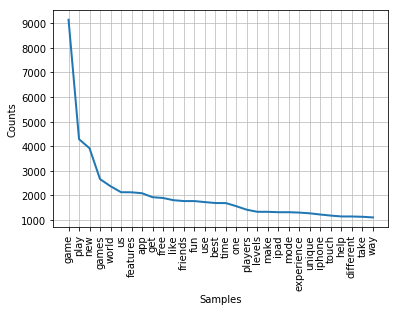

In [36]:
fdist.plot(30,cumulative=False)

In [37]:
k = Counter(fdist) 
high = k.most_common(50)  

In [38]:
high

[('game', 9143),
 ('play', 4289),
 ('new', 3919),
 ('games', 2665),
 ('world', 2377),
 ('us', 2134),
 ('features', 2130),
 ('app', 2092),
 ('get', 1931),
 ('free', 1899),
 ('like', 1809),
 ('friends', 1773),
 ('fun', 1773),
 ('use', 1731),
 ('best', 1694),
 ('time', 1691),
 ('one', 1562),
 ('players', 1420),
 ('levels', 1337),
 ('make', 1336),
 ('ipad', 1321),
 ('mode', 1321),
 ('experience', 1305),
 ('unique', 1275),
 ('iphone', 1226),
 ('touch', 1183),
 ('help', 1148),
 ('different', 1147),
 ('take', 1135),
 ('way', 1109),
 ('find', 1065),
 ('enjoy', 1058),
 ('unlock', 1048),
 ('2', 1042),
 ('real', 1026),
 ('gameplay', 1026),
 ('may', 1003),
 ('items', 990),
 ('facebook', 962),
 ('please', 962),
 ('adventure', 954),
 ('collect', 945),
 ('battle', 944),
 ('support', 933),
 ('mobile', 929),
 ('graphics', 925),
 ('characters', 921),
 ('challenge', 918),
 ('inapp', 890),
 ('even', 870)]

In [39]:
names=['world','friends','adventure','graphics','challenge']

In [40]:
df5 = pd.DataFrame(columns=names) 


In [41]:
df5

,world,friends,adventure,graphics,challenge


In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
df3.head()

,id,word_count,stopwords,hastags,numerics,app_desc,prime_genre
0,281656475,252,93,0,4,save 20 399 limited time one popular video gam...,Games
1,281796108,572,170,0,3,let evernote change way organize personal prof...,Productivity
2,281940292,288,58,0,2,download popular free weather app powered larg...,Weather
3,282614216,638,226,0,0,ebay app best way find anything need dresses h...,Shopping
4,282935706,452,147,2,4,250 million devices around world people readin...,Reference


In [48]:
df_new.drop(['app_desc'],axis=1).head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [49]:
df_new2=pd.merge(df_new,df3,on='id',how='left')

In [54]:
df_new2=df_new2.loc[df_new2['user_rating_ver']!=0]

In [116]:
df_new2.head(4)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,...,ipadSc_urls.num,lang.num,vpp_lic,app_desc_x,word_count,stopwords,hastags,numerics,app_desc_y,prime_genre_y
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,...,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",252,93,0,4,save 20 399 limited time one popular video gam...,Games
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,...,5,23,1,Let Evernote change the way you organize your ...,572,170,0,3,let evernote change way organize personal prof...,Productivity
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,...,5,3,1,Download the most popular free weather app pow...,288,58,0,2,download popular free weather app powered larg...,Weather
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,...,5,9,1,The eBay app is the best way to find anything ...,638,226,0,0,ebay app best way find anything need dresses h...,Shopping


In [65]:
df_new3= df_new2.loc[df_new2['user_rating_ver']>= 4.0]

In [73]:
df_new2['user_rating_ver'].value_counts()

4.5    2205
4.0    1237
5.0     964
3.5     533
3.0     304
2.5     176
2.0     136
1.0     125
1.5      74
Name: user_rating_ver, dtype: int64

In [81]:
count_class_45=2205

In [86]:
df_class_1 = df_new2.loc[df_new2['user_rating_ver'] == 1.0]
df_class_15 = df_new2.loc[df_new2['user_rating_ver'] == 1.5]
df_class_2 = df_new2.loc[df_new2['user_rating_ver'] == 2.0]
df_class_25 = df_new2.loc[df_new2['user_rating_ver'] == 2.5]
df_class_3 = df_new2.loc[df_new2['user_rating_ver'] == 3.0]
df_class_35 = df_new2.loc[df_new2['user_rating_ver'] == 3.5]
df_class_4 = df_new2.loc[df_new2['user_rating_ver'] == 4.0]
df_class_45 = df_new2.loc[df_new2['user_rating_ver'] == 4.5]
df_class_5 = df_new2.loc[df_new2['user_rating_ver'] == 5.0]

In [89]:
df_class_1_over = df_class_1.sample(count_class_45, replace=True)
df_class_15_over = df_class_15.sample(count_class_45, replace=True)
df_class_2_over = df_class_2.sample(count_class_45, replace=True)
df_class_25_over = df_class_25.sample(count_class_45, replace=True)
df_class_3_over = df_class_3.sample(count_class_45, replace=True)
df_class_35_over = df_class_35.sample(count_class_45, replace=True)
df_class_4_over = df_class_4.sample(count_class_45, replace=True)
df_class_5_over = df_class_5.sample(count_class_45, replace=True)

In [91]:
df_test_over = pd.concat([df_class_45, df_class_1_over,df_class_15_over,df_class_2_over,df_class_25_over,df_class_3_over,df_class_35_over,df_class_4_over,df_class_5_over], axis=0)

In [92]:
df_test_over['user_rating_ver'].value_counts()

5.0    2205
3.5    2205
2.5    2205
4.0    2205
3.0    2205
2.0    2205
1.5    2205
1.0    2205
4.5    2205
Name: user_rating_ver, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split
X=df_new2[['price','size_bytes','rating_count_tot','sup_devices.num','lang.num','word_count','stopwords','hastags','numerics']]
y=df_new2['user_rating_ver']
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(
    X, y, test_size=0.20, random_state=23, stratify=y)

In [118]:
from sklearn.model_selection import train_test_split
X=df_test_over[['price','size_bytes','rating_count_tot','sup_devices.num','lang.num','word_count','stopwords','hastags','numerics']]
y=df_test_over['user_rating_ver']
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.20, random_state=23, stratify=y)

In [119]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
new_fit=model.fit(X_train, y_train)
y_pred_lr = new_fit.predict(X_valid)

In [120]:
from sklearn.metrics import r2_score
r2_score(y_valid, y_pred_lr)

0.09367439586697768

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
# fit the model
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)
# predict the metrology
y_pred_rf= rf.predict(X_valid2)
# print the r^2 score
print("r2_score:",metrics.r2_score(y_valid2, y_pred_rf))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


r2_score: 0.8454328472317368


In [124]:
print("MSE:",metrics.mean_squared_error(y_valid2,y_pred_rf))

MSE: 0.1196437880104257


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
vect = TfidfVectorizer()
vect.fit(df3["app_desc"])
X = vect.transform(df3["app_desc"])

In [ ]:
y = df_new["user_rating_ver"].copy()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.20, random_state=23, stratify=y)

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
new_fit=model.fit(X_train, y_train)

In [ ]:
best_predictions = new_fit.predict(X_valid)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_valid, best_predictions)